In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.size

6912

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

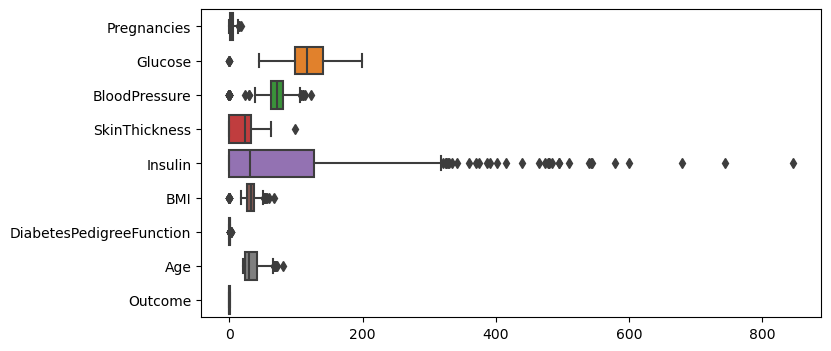

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(8,4))
sns.boxplot(data=df,orient ='h')

In [12]:
# handeling outliers
for x in df.columns[::]:               ### short cut... short form
    if df[x].dtype == object:
        continue
    else:
        q1 = df[x].quantile(q=0.25)
        q3 = df[x].quantile(q=0.75)
        IQR = q3-q1
        
        low = q1-1.5 *(IQR)
        high = q3+1.5*(IQR)
        ## dealing your outliers
        df.loc[(df[x]<low)| (df[x]>high),x]= df[x].median()

<Axes: >

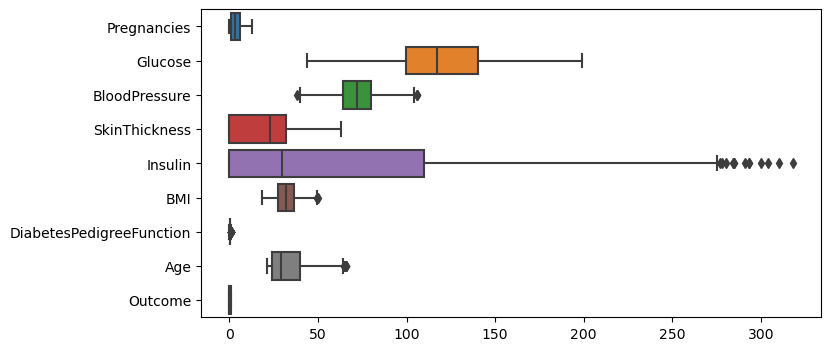

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,orient ='h')

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117692,0.208953,-0.096720,-0.108474,0.028339,0.004519,0.560768,0.202492
Glucose,0.117692,1.000000,0.204539,0.060034,0.179566,0.228245,0.081613,0.274264,0.492782
BloodPressure,0.208953,0.204539,1.000000,0.025645,-0.050956,0.271560,0.022495,0.326372,0.164874
SkinThickness,-0.096720,0.060034,0.025645,1.000000,0.472714,0.373726,0.152763,-0.101397,0.067344
Insulin,-0.108474,0.179566,-0.050956,0.472714,1.000000,0.171503,0.198580,-0.073726,0.078066
BMI,0.028339,0.228245,0.271560,0.373726,0.171503,1.000000,0.123776,0.077668,0.300615
DiabetesPedigreeFunction,0.004519,0.081613,0.022495,0.152763,0.198580,0.123776,1.000000,0.036109,0.151994
Age,0.560768,0.274264,0.326372,-0.101397,-0.073726,0.077668,0.036109,1.000000,0.265858
Outcome,0.202492,0.492782,0.164874,0.067344,0.078066,0.300615,0.151994,0.265858,1.000000


In [15]:
x = df.drop("Outcome", axis=1)
y = df['Outcome'].values.reshape(-1,1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [16]:
#ignore warning
# import the class
from sklearn.linear_model import LogisticRegression
# instantitate the model(using the defafuale parameters)
logreg=LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)
# prediction with test
y_pred=logreg.predict(x_test)
y_train_pred=logreg.predict(x_train)

In [17]:
logreg.score(x_train,y_train)

0.7719869706840391

In [18]:
logreg.score(x_test,y_test)

0.7727272727272727

In [19]:
# performancee mesure of the classification(metrix is measures of quantitative assessment commonly used for assessing, comparing, and tracking performance or production. )
# import the metrix class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[87,  8],
       [27, 32]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cnf_matrix

array([[357,  48],
       [ 92, 117]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.80      0.54      0.65        59

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.77      0.76       154



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       405
           1       0.71      0.56      0.63       209

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [23]:
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

accuracy: 0.7727272727272727
precision: 0.8
Recall: 0.5423728813559322


In [24]:
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print("precision:",metrics.precision_score(y_train,y_train_pred))
print("Recall:",metrics.recall_score(y_train,y_train_pred))

accuracy: 0.7719869706840391
precision: 0.7090909090909091
Recall: 0.5598086124401914


In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid= {"C":[1,2,3,4,5,6,7,8,9,10], 
            "penalty":['l1',"l2"],
            "solver":['lbfgs','liblinear'],
            'max_iter':[10000,100000,1000000]} # parameters
grid_search = GridSearchCV(logreg,param_grid,scoring='precision',cv=5)# score
grid_search.fit(y_test,y_pred)

lr = grid_search.best_estimator_
grid_search.best_params_,grid_search.best_score_

({'C': 2, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'},
 0.5529137529137529)

In [26]:
logreg=LogisticRegression(C= 1, max_iter= 1000000000, penalty='l1',solver= 'liblinear')
# fit the model with data
logreg.fit(x_train,y_train)
# prediction with test
y_pred=logreg.predict(x_test)
y_train_pred=logreg.predict(x_train)

In [27]:
# import the metrix class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[86,  9],
       [27, 32]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

